# **Ridge Regression (1D Data) From Scratch**

## Overview

### This notebook demonstrates Ridge Regression on a simple 1D dataset. Ridge Regression is a linear regression technique that includes L2 regularization to prevent overfitting by penalizing large coefficients.

In [42]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

## Data Generation:

### Synthetic 1D regression data is generated using `make_regression` from scikit-learn with added noise.

In [43]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=7)

## Data Visualization:

### The data is plotted to visualize the relationship between the feature (`X`) and target (`y`).

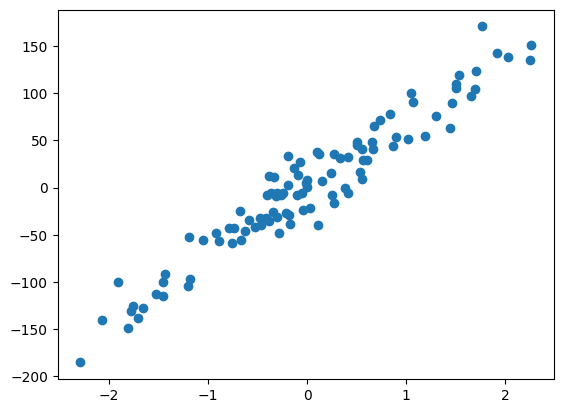

In [44]:
plt.scatter(X,y)

## Train-Test Split:

### The dataset is split into training and testing sets using `train_test_split`.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Linear Regression (Baseline):

* #### A standard linear regression model is trained to establish a baseline performance.
* #### Coefficients and intercept are extracted, and predictions are made on the test set.
* #### The R² score is computed to evaluate performance.

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.coef_

array([67.65712361])

In [50]:
lr.intercept_

0.4169717039675749

In [51]:
y_pred1 = lr.predict(X_test)
y_pred1

array([   2.63748957,  114.79307822,   72.97721597,  153.31848434,
         16.47213208,   -5.99526266,    0.55672243, -154.40384602,
        -35.07626788,  -70.62414548,  -97.73177637,  102.12717867,
         99.33003743,   44.71247643,  -16.00673272,   18.98614069,
       -119.87826367,  -79.41722265,   60.92627614, -111.29005354])

In [52]:
from sklearn.metrics import r2_score

In [53]:
score1 = r2_score(y_pred1, y_test)
score1

0.9723206505704729

## Ridge Regression (scikit-learn):

* #### Ridge Regression is implemented using `Ridge` from scikit-learn with `alpha=10`.
* #### Coefficients and intercept are compared to linear regression.
* #### Predictions and R² score are computed.

In [54]:
from sklearn.linear_model import Ridge

In [55]:
rid = Ridge(10)
rid.fit(X_train, y_train)

Ridge(alpha=10)

In [56]:
rid.coef_

array([59.48927189])

In [57]:
rid.intercept_

0.5581540688034439

In [58]:
y_pred2 = rid.predict(X_test)
y_pred2

array([   2.51060171,  101.1262973 ,   64.35862132,  135.00075482,
         14.67506814,   -5.07996847,    0.6810335 , -135.57204521,
        -30.65019277,  -61.9065815 ,  -85.74166549,   89.98947827,
         87.53001966,   39.50611969,  -13.88281187,   16.8855751 ,
       -105.21453597,  -69.63812152,   53.7625215 ,  -97.66313058])

In [59]:
score2 = r2_score(y_pred2, y_test)
score2

0.9287284291391521

## Custom Ridge Regression Implementation:

* #### A custom Ridge Regression class is implemented from scratch.
* #### The `fit` method calculates coefficients using the closed-form solution with L2 regularization.
* #### The `predict` method uses these coefficients to make predictions.
* #### Results are validated against scikit-learn's implementation.

In [60]:
class RidgeRegression:
    def __init__(self, alpha):
        self.m = None
        self.b = None
        self.alpha = alpha

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        X_train_mean = X_train.mean()
        y_train_mean = y_train.mean()

        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_train_mean) * (y_train[i] - y_train.mean())
            den += (X_train[i] - X_train_mean) ** 2

        self.m = num/(den + self.alpha)
        self.b = y_train_mean - (self.m * X_train_mean)

    def predict(self, X_test):
        return (self.m * X_test) + self.b

In [61]:
rid2 = RidgeRegression(10)
rid2.fit(X_train, y_train)

In [62]:
rid2.m

array([59.48927189])

In [63]:
rid2.b

array([0.55815407])

In [64]:
y_pred3 = rid2.predict(X_test)
y_pred3

array([[   2.51060171],
       [ 101.1262973 ],
       [  64.35862132],
       [ 135.00075482],
       [  14.67506814],
       [  -5.07996847],
       [   0.6810335 ],
       [-135.57204521],
       [ -30.65019277],
       [ -61.9065815 ],
       [ -85.74166549],
       [  89.98947827],
       [  87.53001966],
       [  39.50611969],
       [ -13.88281187],
       [  16.8855751 ],
       [-105.21453597],
       [ -69.63812152],
       [  53.7625215 ],
       [ -97.66313058]])

In [65]:
score3 = r2_score(y_pred3, y_test)
score3

0.9287284291391515

## Observations

* #### Ridge Regression shrinks coefficients compared to linear regression due to the L2 penalty.
* #### The custom implementation matches scikit-learn's results, confirming correctness.
* #### The R² score is slightly lower for Ridge Regression, but the model is more regularized and less prone to overfitting.